In [14]:
import numpy as np
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
import matplotlib.pyplot as plt

np.random.seed() # shuffle random seed generator

#Comment to turn on warnings
warnings.filterwarnings("ignore")



# Ising model parameters
L=40 # linear system size
J=-1.0 # Ising interaction
T=np.linspace(0.25,4.0,16) # set of temperatures
T_c=2.26 # Onsager critical temperature in the TD limit

In [68]:
#题数
which = 0

输入预处理

In [15]:
######### LOAD DATA
# The data consists of 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "Ising2DFM_reSample_L40_T=All.pkl"
# The labels are obtained from the following file:
label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"
#DATA
data = pickle.load(open(data_file_name,"rb"))
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
#data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

#LABELS (convention is 1 for ordered states and 0 for disordered states)
labels = pickle.load(open(label_file_name,"rb")) 

数据集分划

In [16]:
###### define ML parameters

# divide data into ordered, critical and disordered
X_ordered=data[:70000,:]
Y_ordered=labels[:70000]
X_critical=data[70000:100000,:]
Y_critical=labels[70000:100000]
X_disordered=data[100000:,:]
Y_disordered=labels[100000:]
del data,labels
# define training and test data sets
X=np.concatenate((X_ordered,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered))


第一问

模型建立与fit

In [71]:
if which==0 :    
    # Apply Random Forest
    classifer_0 = RandomForestClassifier 
    n_estimator_0 = 90
    leaf_size_0= 2
    print_flag_0=True

    RFC_train_accuracy_0 = []
    RFC_critical_accuracy_0 = [] #crticial数据集为测试集

    train_to_test_ratio_0 = np.linspace(0.001, 0.9, 50)# training samples

    for lamda in train_to_test_ratio_0:
        # Define Random Forest Classifier
        myRF_clf_0 = classifer_0(
        n_estimators=n_estimator_0,
        max_depth=None,
        min_samples_split=leaf_size_0, # minimum number of sample per leaf
        oob_score=False,
        random_state=0,
        warm_start=True # this ensures that you add estimators without retraining everything
        )
        
        # pick random data points from ordered and disordered states
        # to create the training and test sets
        X_train_0,X_test_0,Y_train_0,Y_test_0=train_test_split(X,Y,train_size=lamda,test_size=1.0-lamda)
        start_time_0 = time.time()
        myRF_clf_0.fit(X_train_0, Y_train_0)
        run_time = time.time() - start_time_0

        # check accuracy
        train_accuracy_0 = myRF_clf_0.score(X_train_0,Y_train_0)
        critical_accuracy_0 = myRF_clf_0.score(X_critical,Y_critical)
        RFC_train_accuracy_0.append(train_accuracy_0)
        RFC_critical_accuracy_0.append(critical_accuracy_0)
        if print_flag_0:
            result_0 = (run_time, lamda, train_accuracy_0, critical_accuracy_0)
            print('{0:<15}{1:<15}{2:<15}{3:<15}'.format("time (s)","lamda","train score","critical score"))
            print('{0:<15.4f}{1:<15.4f}{2:<15.4f}{3:<15.4f}'.format(*result_0))

time (s)       lamda          train score    critical score 
0.0771         0.0010         1.0000         0.9136         
time (s)       lamda          train score    critical score 
0.3261         0.0193         1.0000         0.8575         
time (s)       lamda          train score    critical score 
0.6642         0.0377         1.0000         0.8761         
time (s)       lamda          train score    critical score 
1.0935         0.0560         1.0000         0.8894         
time (s)       lamda          train score    critical score 
1.6205         0.0744         1.0000         0.8855         
time (s)       lamda          train score    critical score 
2.1701         0.0927         1.0000         0.8828         
time (s)       lamda          train score    critical score 
2.7013         0.1111         1.0000         0.8768         
time (s)       lamda          train score    critical score 
3.3112         0.1294         1.0000         0.8729         
time (s)       lamda    

作图

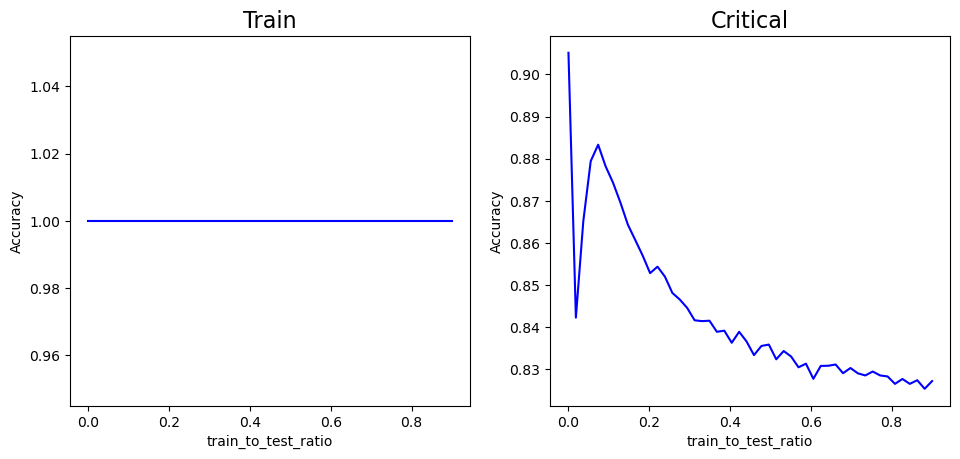

In [70]:
if which==0 :    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(train_to_test_ratio_0,RFC_train_accuracy_0,'b')
    axes[0].set_title('Train',fontsize=16)
    axes[0].set_xlabel('train_to_test_ratio')
    axes[0].set_ylabel('Accuracy')
    axes[1].plot(train_to_test_ratio_0,RFC_critical_accuracy_0,'b')
    axes[1].set_title('Critical',fontsize=16)
    axes[1].set_xlabel('train_to_test_ratio')
    axes[1].set_ylabel('Accuracy')

    fig.subplots_adjust(right=1.5)
    fig.savefig("pic/hw1Q1.png")
    fig.show()

第二题

模型建立与fit

In [19]:
if which==1 :    
    train_to_test_ratio=0.9 # training samples

    # pick random data points from ordered and disordered states
    # to create the training and test sets
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=train_to_test_ratio,test_size=1.0-train_to_test_ratio)

    # Apply Random Forest
    classifer = RandomForestClassifier 
    n_estimator_range=np.arange(10, 101, 10)
    leaf_size_list=np.arange(2, 20, 2)
    tree_height_range=np.arange(5, 21, 5)
    n=len(n_estimator_range)
    m=len(leaf_size_list)
    l=len(tree_height_range)
    

    #Allocate Arrays for various quantities
    RFC_train_accuracy=np.zeros((n,m,l))
    RFC_test_accuracy=np.zeros((n,m,l))
    RFC_critical_accuracy=np.zeros((n,m,l))
    run_time=np.zeros((n,m,l))
    print_flag=True

    for i, n_estimator in enumerate(n_estimator_range):
        for j, leaf_size in enumerate(leaf_size_list):
            for k, tree_height in enumerate(tree_height_range):
                # Define Random Forest Classifier
                myRF_clf = classifer(
                n_estimators=n_estimator,
                max_depth=tree_height,
                min_samples_split=leaf_size, # minimum number of sample per leaf
                oob_score=False,
                random_state=0,
                warm_start=True # this ensures that you add estimators without retraining everything
                )
            
                print('n_estimators: %i, leaf_size: %i, tree_height: %i'%(n_estimator,leaf_size,tree_height))
                start_time = time.time()
                myRF_clf.fit(X_train, Y_train)
                run_time[i,j,k] = time.time() - start_time
                # check accuracyRFC_train_accuracy[i,j]=myRF_clf.score(X_train,Y_train)
                RFC_test_accuracy[i,j,k]=myRF_clf.score(X_test,Y_test)
                RFC_critical_accuracy[i,j,k]=myRF_clf.score(X_critical,Y_critical)
                if print_flag:
                    result = (run_time[i,j,k], RFC_critical_accuracy[i,j,k])
                    print('{0:<15}{1:<15}'.format("time (s)", "critical score"))
                    print('{0:<15.4f}{1:<15.4f}'.format(*result))

n_estimators: 10, leaf_size: 2, tree_height: 5
time (s)       critical score 
2.8311         0.8009         
n_estimators: 10, leaf_size: 2, tree_height: 10
time (s)       critical score 
3.9958         0.8255         
n_estimators: 10, leaf_size: 2, tree_height: 15
time (s)       critical score 
4.3770         0.8075         
n_estimators: 10, leaf_size: 2, tree_height: 20
time (s)       critical score 
4.3692         0.8077         
n_estimators: 10, leaf_size: 4, tree_height: 5
time (s)       critical score 
2.8226         0.8009         
n_estimators: 10, leaf_size: 4, tree_height: 10
time (s)       critical score 
4.0068         0.8255         
n_estimators: 10, leaf_size: 4, tree_height: 15
time (s)       critical score 
4.3914         0.8063         
n_estimators: 10, leaf_size: 4, tree_height: 20
time (s)       critical score 
4.4043         0.8063         
n_estimators: 10, leaf_size: 6, tree_height: 5
time (s)       critical score 
2.8267         0.8009         
n_estimators:

3维散点图作图

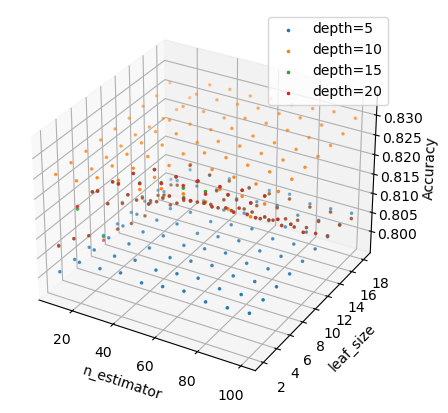

In [42]:
%matplotlib inline
if which==1 : 
    # 生成坐标
    x = []
    y = []
    for j in range(n):
        for k in range(m):
            x.append(n_estimator_range[j])
            y.append(leaf_size_list[k])

    plt.figure(figsize=(5, 5), dpi=100)
    ax=plt.axes(projection='3d')
    for i in range(l):
        ax.scatter3D(x,y,RFC_critical_accuracy[:,:,i],s=10,marker='.',label=f"depth={tree_height_range[i]}")
    ax.set_xlabel('n_estimator')
    ax.set_ylabel('leaf_size')
    ax.set_zlabel('Accuracy')

    plt.legend(loc=1)
    plt.savefig("pic/hw1Q2_3dscatter.png")
    plt.show()

输出最优参数

In [35]:
if which==1:
    max = 0
    i_max = j_max = k_max = 0
    for i in range(n):
        for j in range(m):
            for k in range(l):
                if(max<RFC_critical_accuracy[i,j,k]):
                    max = RFC_critical_accuracy[i,j,k]
                    i_max = i
                    j_max = j
                    k_max = k
    print(f"best n_estimator = {n_estimator_range[i_max]}")
    print(f"best leaf_size = {leaf_size_list[j_max]}")
    print(f"best tree_height = {tree_height_range[k_max]}")

best n_estimator = 90
best leaf_size = 2
best tree_height = 20


下面我们在最佳参数附近分开作图

树木棵数

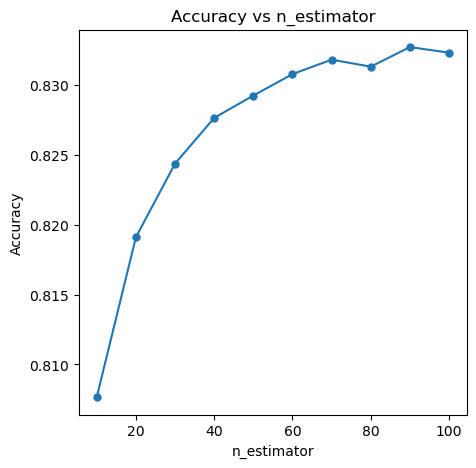

In [62]:
if which==1:
    plt.figure(figsize=(5, 5), dpi=100)
    x = n_estimator_range
    y = np.array(RFC_critical_accuracy[:,0,3])
    plt.plot(x,y,'-o',markersize=5)
    plt.xlabel('n_estimator')
    plt.ylabel('Accuracy')

    plt.title("Accuracy vs n_estimator")
    plt.savefig("pic/hw1Q2_n_estimator.png")
    plt.show()

叶子最小样本数

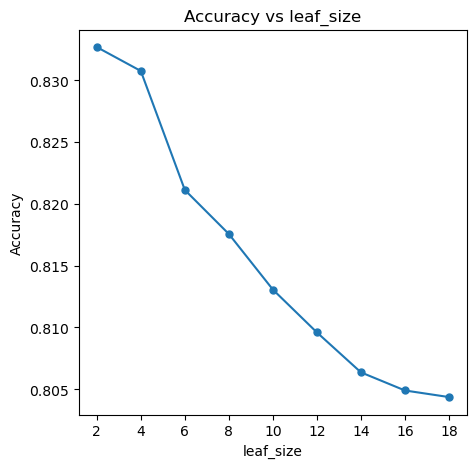

In [63]:
if which==1:
    plt.figure(figsize=(5, 5), dpi=100)
    x = leaf_size_list
    y = np.array(RFC_critical_accuracy[8,:,3])
    plt.plot(x,y,'-o',markersize=5)
    plt.xlabel('leaf_size')
    plt.ylabel('Accuracy')

    plt.title("Accuracy vs leaf_size")
    plt.savefig("pic/hw1Q2_leaf_size.png")
    plt.show()

最大深度

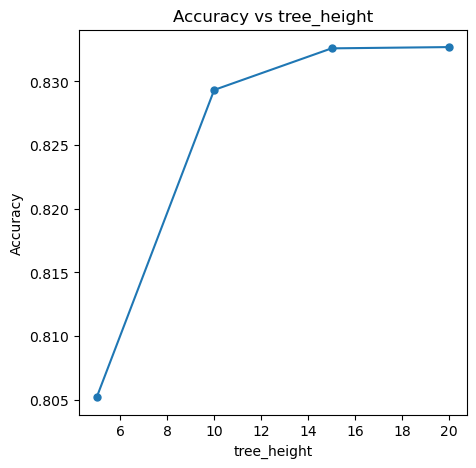

In [64]:
if which==1:
    plt.figure(figsize=(5, 5), dpi=100)
    x = tree_height_range
    y = np.array(RFC_critical_accuracy[8,0,:])
    plt.plot(x,y,'-o',markersize=5)
    plt.xlabel('tree_height')
    plt.ylabel('Accuracy')

    plt.title("Accuracy vs tree_height")
    plt.savefig("pic/hw1Q2_tree_height.png")
    plt.show()

画出决策树

[Text(0.4884231154983108, 0.9666666666666667, 'X[1556] <= 0.5\ngini = 0.497\nsamples = 74055\nvalue = [54310, 62690]'),
 Text(0.32647540118243246, 0.9, 'X[1002] <= 0.5\ngini = 0.497\nsamples = 37101\nvalue = [26985, 31542]'),
 Text(0.25915857263513514, 0.8333333333333334, 'X[1311] <= 0.5\ngini = 0.419\nsamples = 28239\nvalue = [13322, 31299]'),
 Text(0.2028610641891892, 0.7666666666666667, 'X[513] <= 0.5\ngini = 0.287\nsamples = 23898\nvalue = [6562, 31167]'),
 Text(0.15656672297297297, 0.7, 'X[988] <= 0.5\ngini = 0.166\nsamples = 21625\nvalue = [3112, 31045]'),
 Text(0.11887668918918919, 0.6333333333333333, 'X[1525] <= 0.5\ngini = 0.088\nsamples = 20526\nvalue = [1495, 30916]'),
 Text(0.08741554054054054, 0.5666666666666667, 'X[534] <= 0.5\ngini = 0.044\nsamples = 19946\nvalue = [706, 30796]'),
 Text(0.0633445945945946, 0.5, 'X[241] <= 0.5\ngini = 0.019\nsamples = 19584\nvalue = [302, 30637]'),
 Text(0.04560810810810811, 0.43333333333333335, 'X[1299] <= 0.5\ngini = 0.008\nsamples = 19

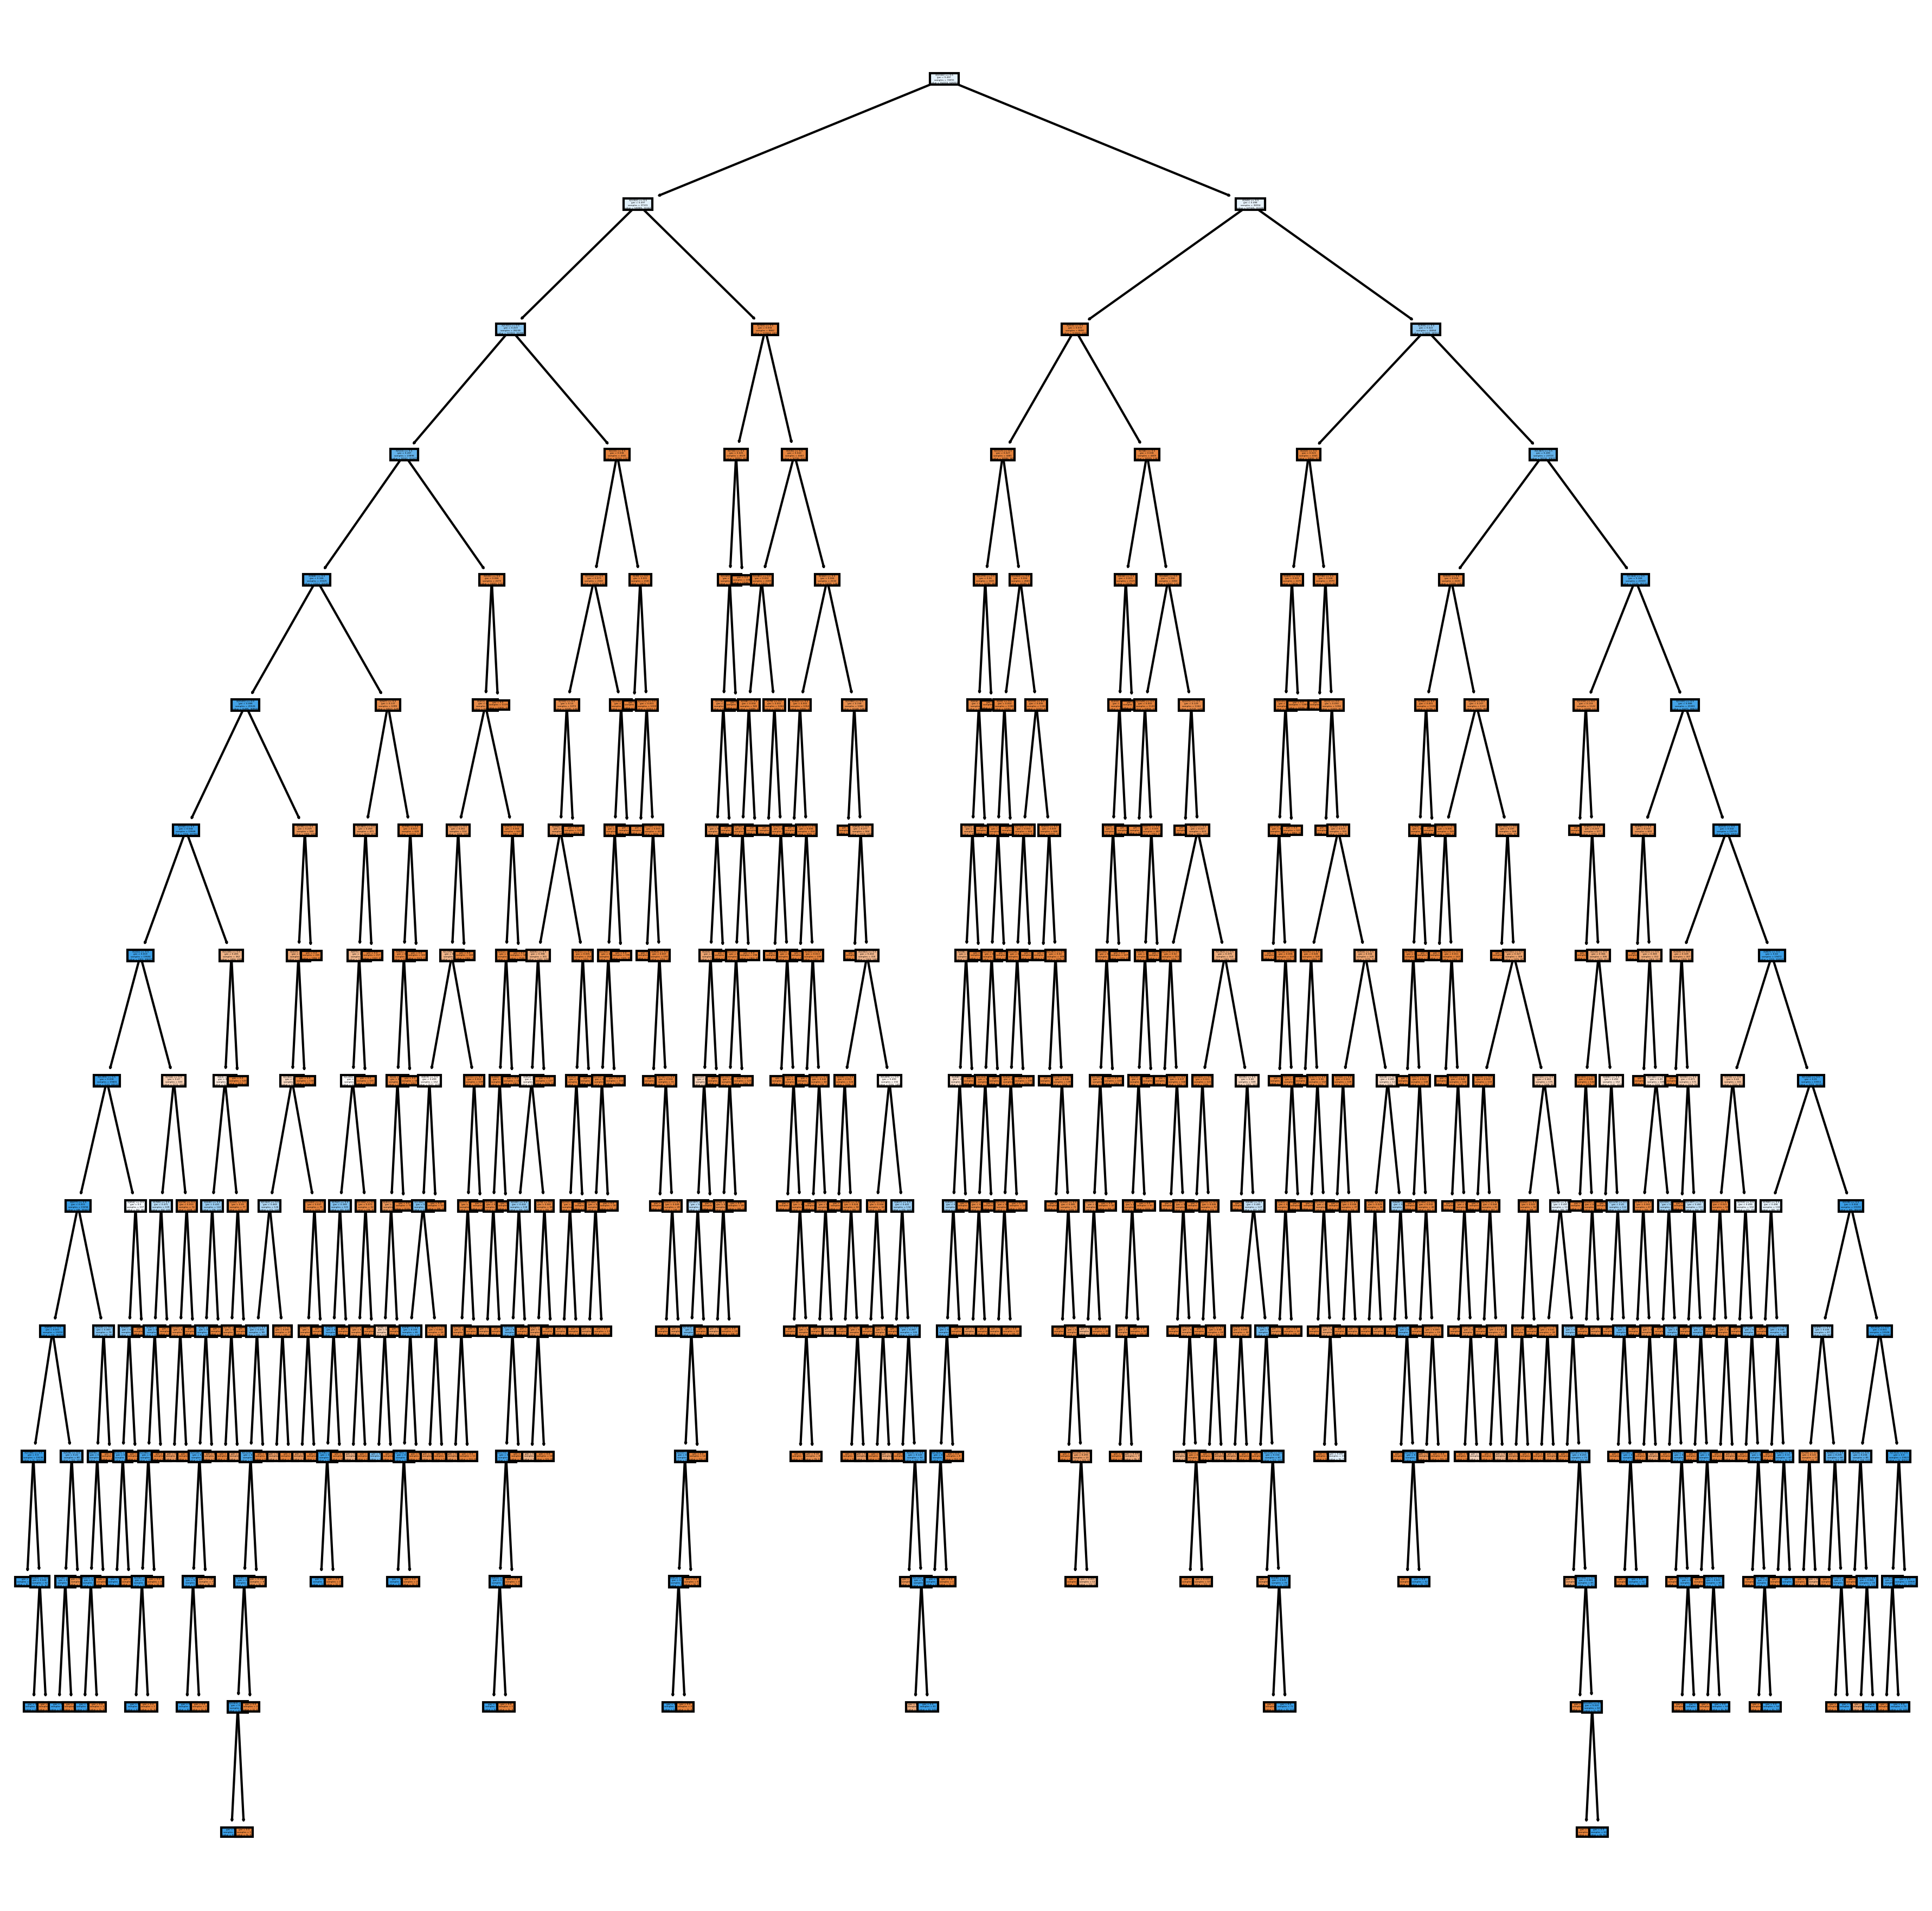

In [67]:
from sklearn import tree
plt.figure(figsize=(15, 15), dpi=300)
tree.plot_tree(myRF_clf.estimators_[0],filled=True)